In [38]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [39]:
env = gym.make('CartPole-v1')

In [40]:
def epsilonGreedyAction(Q, state, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(0, 2)  # Choose random action (0 or 1)
    else:
        return np.argmax(Q[state])  # Choose greedy action based on Q-values

In [41]:
#discretize the spaces
poleThetaSpace = np.linspace(-0.20943951, 0.20943951, 10)
poleThetaVelSpace = np.linspace(-3.0, 3.0, 10)
cartPosSpace = np.linspace(-2.4, 2.4, 10)
cartVelSpace = np.linspace(-3.0 ,3.0, 10)

def getState(observation):
    cartX, cartXdot, cartTheta, cartThetadot = observation
    cartX = int(np.digitize(cartX, cartPosSpace))
    cartXdot = int(np.digitize(cartXdot, cartVelSpace))
    cartTheta = int(np.digitize(cartTheta, poleThetaSpace))
    cartThetadot = int(np.digitize(cartThetadot, poleThetaVelSpace))

    return (cartX, cartXdot, cartTheta, cartThetadot)

In [42]:
# Model hyperparameters
ALPHA = 0.1
GAMMA = 0.99
EPS = 1.0
# Initialize Q-values
Q = {}
for i in range(11):
    for j in range(11):
        for k in range(11):
            for l in range(11):
                Q[(i, j, k, l)] = np.random.uniform( - 0.5,0.5,size = 2)  # Initialize Q-values for each state-action pair

Episode 0	Average length (last 100 episodes): 10.00
Episode 5000	Average length (last 100 episodes): 132.25
Solved after 8212 episodes! Running average is now 195.05. Last episode ran to 355.0 time steps.


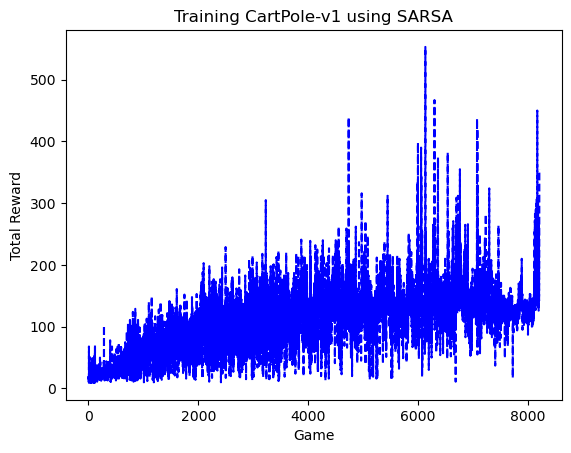

In [44]:
numGames = 50000
totalRewards = []
mean_score = 0.0

for i in range(numGames):
    # Cart x position, cart velocity, pole theta, pole velocity
    observation,_ = env.reset()
    s = getState(observation)
    rand = np.random.random()
    a = epsilonGreedyAction(Q, s, EPSILON)
    done = False
    epRewards = 0
    while not done:
            observation_, reward, done, _ ,_ = env.step(a)
            s_ = getState(observation_)
            a_ = epsilonGreedyAction(Q, s_, EPSILON)
            epRewards += reward

            # SARSA Q-value update
            Q[s][a] = Q[s][a] + ALPHA * (reward + GAMMA * Q[s_][a_] - Q[s][a])

            s = s_
            a = a_

    EPSILON -= 2 / numGames if EPSILON > 0 else 0
    totalRewards.append(epRewards)
    mean_score = np.mean(totalRewards[-100:])
    if i % 5000 == 0:
        print('Episode {}\tAverage length (last 100 episodes): {:.2f}'.format(i, mean_score))

    if mean_score > 195:
        print("Solved after {} episodes! Running average is now {}. Last episode ran to {} time steps.".format(i, mean_score, epRewards))
        break


plt.plot(totalRewards, 'b--')
plt.xlabel('Game')
plt.ylabel('Total Reward')
plt.title('Training CartPole-v1 using SARSA')
plt.show()